In [1]:
# Importing librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math
%matplotlib inline
import mplfinance as mpf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Importing data
data = pd.read_csv('stocks.csv')

In [3]:
# Checking the data
data.head(10)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600
6,AAPL,2023-02-15,153.110001,155.500000,152.880005,155.330002,155.330002,65573800
7,AAPL,2023-02-16,153.509995,156.330002,153.350006,153.710007,153.710007,68167900
8,AAPL,2023-02-17,152.350006,153.000000,150.850006,152.550003,152.550003,59144100
9,AAPL,2023-02-21,150.199997,151.300003,148.410004,148.479996,148.479996,58867200


In [4]:
data['Ticker'].unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

In [5]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [7]:
data.shape

(248, 8)

In [8]:
data.dtypes

Ticker        object
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
data.describe

<bound method NDFrame.describe of     Ticker        Date        Open        High         Low       Close  \
0     AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1     AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2     AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3     AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4     AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   
..     ...         ...         ...         ...         ...         ...   
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  2023-05-05  105.320000  106.440002  104.738998  106.214996   

      Adj Close    Volume  
0    154.414230  83322600  
1    151.688400  6412

In [10]:
data.isnull().any()

Ticker       False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [11]:
data.isnull().sum()

Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
# Check for duplicates
print('\nChecking for duplicate rows:')
print(f'Number of duplicate rows: {data.duplicated().sum()}')


Checking for duplicate rows:
Number of duplicate rows: 0


In [13]:
# Convert 'Date' to datetime objects and analyze the time range
data['Date'] = pd.to_datetime(data['Date'])
print('\nDate Range:')
print(f"Start Date: {data['Date'].min()}")
print(f"End Date: {data['Date'].max()}")


Date Range:
Start Date: 2023-02-07 00:00:00
End Date: 2023-05-05 00:00:00


In [14]:
# Analyze the Ticker column
print('\nTicker Counts:')
print(data['Ticker'].value_counts())


Ticker Counts:
Ticker
AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: count, dtype: int64


In [15]:
# Analyze Daily Price Range
data['Daily_Range'] = data['High'] - data['Low']
print('\nDaily Price Range Statistics:')
print(data.groupby('Ticker')['Daily_Range'].describe())


Daily Price Range Statistics:
        count      mean       std       min       25%       50%        75%  \
Ticker                                                                       
AAPL     62.0  2.803065  0.904700  1.199997  2.127495  2.800003   3.330002   
GOOG     62.0  2.529645  1.220019  0.839996  1.723253  2.260002   2.852505   
MSFT     62.0  5.736614  2.323552  2.730011  4.229984  5.164993   6.637486   
NFLX     62.0  9.819517  3.246085  4.709991  7.507515  9.134995  11.897499   

              max  
Ticker             
AAPL     5.440002  
GOOG     6.750000  
MSFT    13.279999  
NFLX    18.639984  


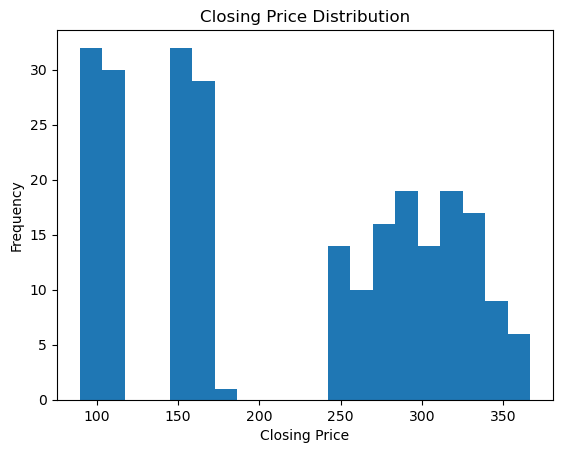

In [16]:
# The distribution of the closing prices to understand their range and frequency.
plt.hist(data['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

Text(0.5, 1.0, 'Total Volume by Ticker')

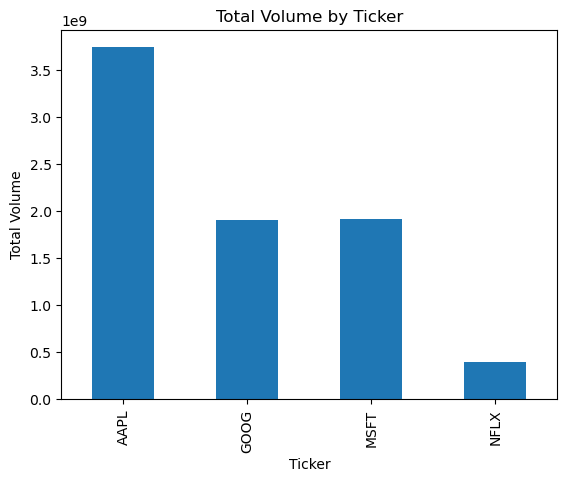

In [17]:
# The cumulative volume traded over time to observe any trends or spikes.
ticker_volume = data.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')

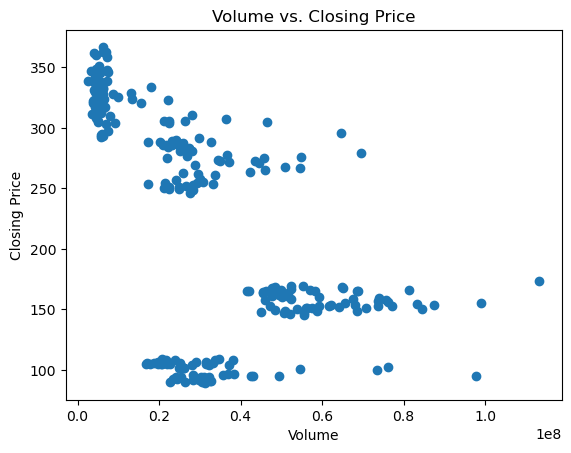

In [18]:
# Exploring the relationship between volume and closing prices, to identify any correlations.
plt.scatter(data['Volume'], data['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

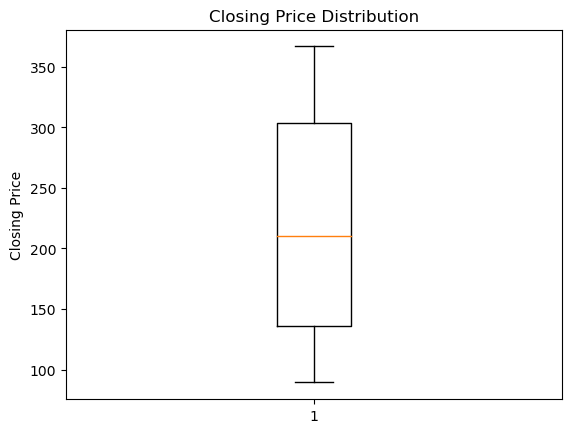

In [19]:
# Illustrating the distribution of the closing prices, including the median, quartiles, and outliers.
plt.boxplot(data['Close'])
plt.ylabel('Closing Price')
plt.title('Closing Price Distribution')
plt.show()

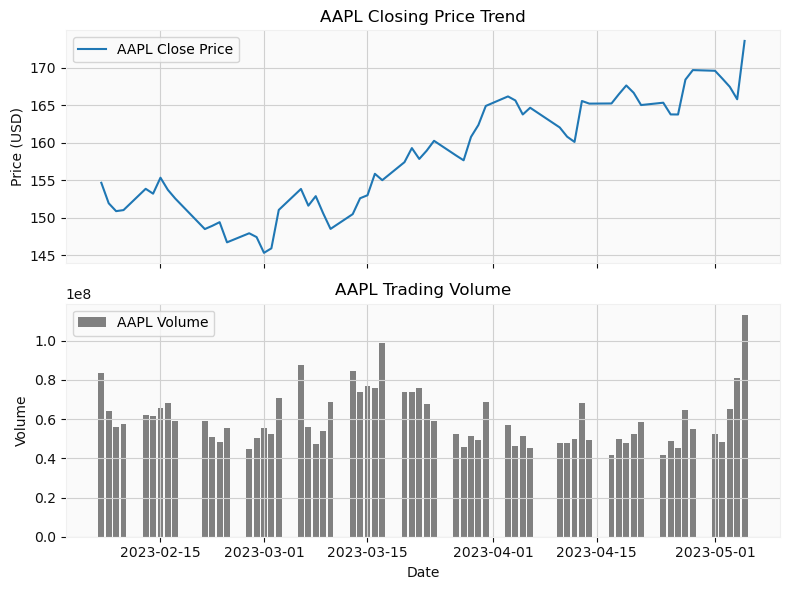

In [60]:
# Line Chart for Closing Price and Volume 
aapl_data = data[data['Ticker'] == 'AAPL'].sort_values('Date')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Plotting Closing Price
ax1.plot(aapl_data['Date'], aapl_data['Close'], label='AAPL Close Price')
ax1.set_title('AAPL Closing Price Trend')
ax1.set_ylabel('Price (USD)')
ax1.grid(True)
ax1.legend()

# Plotting Volume
ax2.bar(aapl_data['Date'], aapl_data['Volume'], color='gray', label='AAPL Volume')
ax2.set_title('AAPL Trading Volume')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()

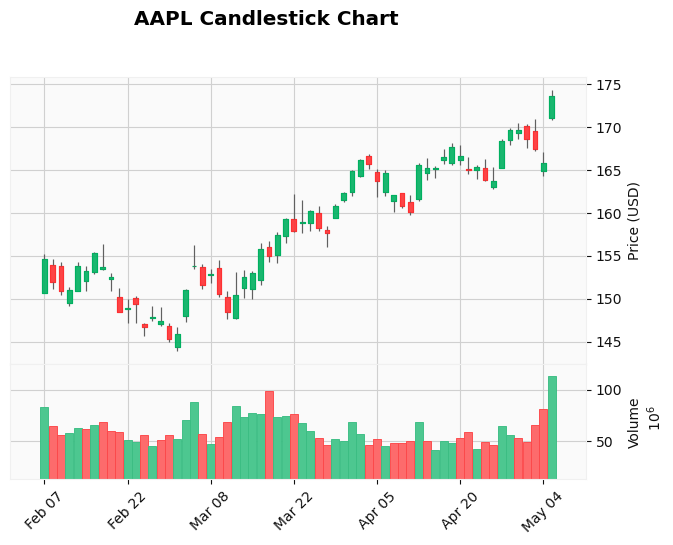

In [64]:
# mplfinance requires a DataFrame with a DatetimeIndex
aapl_data = data[data['Ticker'] == 'AAPL'].sort_values('Date')
aapl_data = aapl_data.set_index(pd.DatetimeIndex(aapl_data['Date']))

mpf.plot(aapl_data,
         type='candle',
         style='yahoo',
         title='AAPL Candlestick Chart',
         ylabel='Price (USD)',
         volume=True,
         ylabel_lower='Volume')

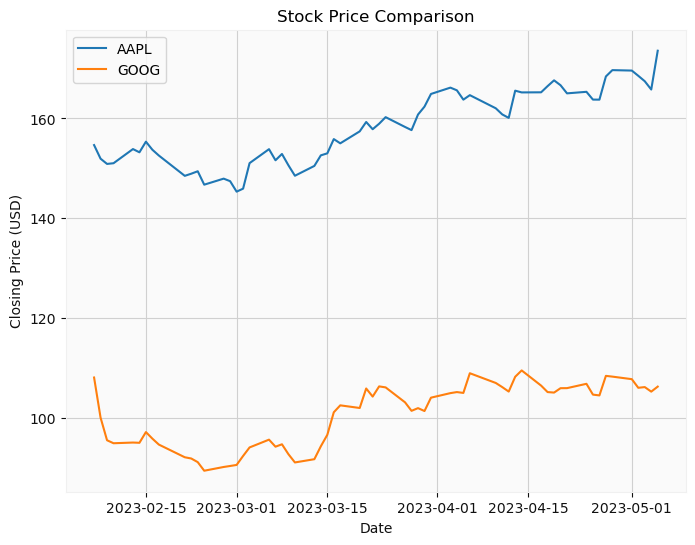

In [68]:
# Filter data for two tickers, e.g., 'AAPL' and 'GOOG'
aapl_data = data[data['Ticker'] == 'AAPL'].sort_values('Date')
goog_data = data[data['Ticker'] == 'GOOG'].sort_values('Date')

plt.figure(figsize=(8, 6))
plt.plot(aapl_data['Date'], aapl_data['Close'], label='AAPL')
plt.plot(goog_data['Date'], goog_data['Close'], label='GOOG')
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

<Figure size 800x500 with 0 Axes>

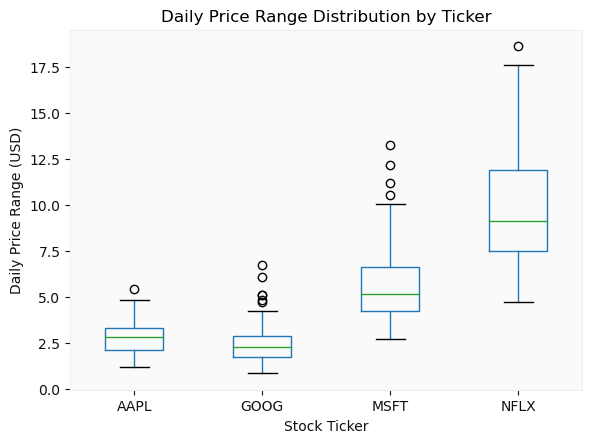

In [72]:
# First, calculate the daily range
data['Daily_Range'] = data['High'] - data['Low']
plt.figure(figsize=(8, 5))
data.boxplot(column='Daily_Range', by='Ticker', grid=False)
plt.suptitle('') # Suppress the default title
plt.title('Daily Price Range Distribution by Ticker')
plt.xlabel('Stock Ticker')
plt.ylabel('Daily Price Range (USD)')
plt.show()

In [24]:
# Two-Sample T-Test for Mean Closing Prices
# Filter the data for two different stocks
aapl_close = data[data['Ticker'] == 'AAPL']['Close']
goog_close = data[data['Ticker'] == 'GOOG']['Close']

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(aapl_close, goog_close, equal_var=False)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant difference in the mean closing prices.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant difference in the mean closing prices.")

T-statistic: 46.8845
P-value: 0.0000
Conclusion: Reject the null hypothesis. There is a statistically significant difference in the mean closing prices.


In [25]:
# Pearson Correlation for Price and Volume
# Select a single stock for this analysis
aapl_data = data[data['Ticker'] == 'AAPL']

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(aapl_data['Close'], aapl_data['Volume'])

print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Conclusion: Reject the null hypothesis. There is a statistically significant correlation between price and volume.")
else:
    print("Conclusion: Fail to reject the null hypothesis. There is no statistically significant correlation between price and volume.")

Pearson Correlation Coefficient: -0.0563
P-value: 0.6638
Conclusion: Fail to reject the null hypothesis. There is no statistically significant correlation between price and volume.


Mean Squared Error (MSE): 1.0942
R-squared (R²): 0.9854

Model Coefficients:
Days_Since_Start: -0.0016
Open: -0.5489
High: 0.7733
Low: 0.7944
Volume: -0.0000
Intercept: -2.5707


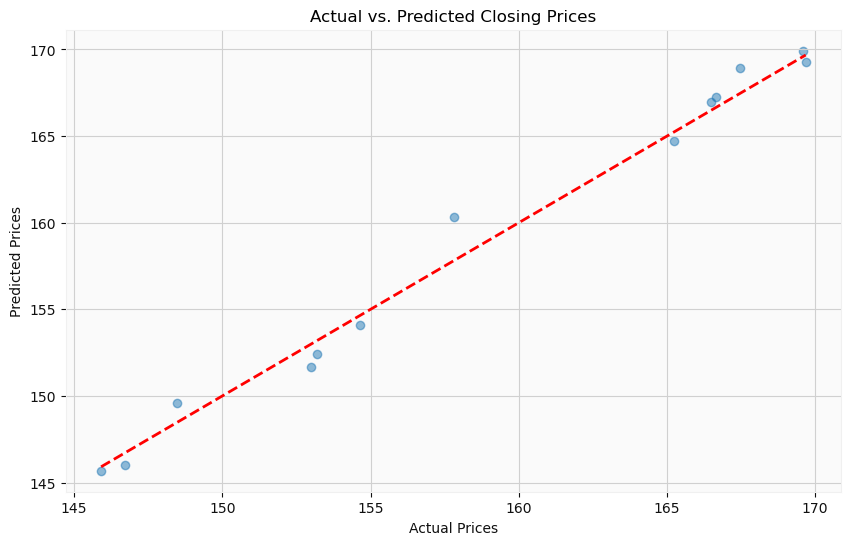

In [26]:
data['Date'] = pd.to_datetime(data['Date'])

aapl_data = data[data['Ticker'] == 'AAPL'].copy()
aapl_data = aapl_data.sort_values('Date')

# Feature Engineering: Create a numerical feature for the date
# Using the number of days since the first date in the dataset
aapl_data['Days_Since_Start'] = (aapl_data['Date'] - aapl_data['Date'].min()).dt.days

# Define the features (X) and target (y)
features = ['Days_Since_Start', 'Open', 'High', 'Low', 'Volume']
target = 'Close'

X = aapl_data[features]
y = aapl_data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Printing the model coefficients to see the weight of each feature
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"Intercept: {model.intercept_:.4f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Actual vs. Predicted Closing Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()